# Figure S2

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
import scipy.stats as sp
import importlib
from matplotlib import patches

import replay_structure.metadata as meta
import replay_structure.read_write as read_write
from replay_structure.utils import get_marginal_sum

In [9]:
SMALL_SIZE = 5
MEDIUM_SIZE = 6
BIGGER_SIZE = 7

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [10]:
mean_trajectories_2cm = dict()
for session in meta.Session_List:
    mean_trajectories_2cm[str(session)] = read_write.load_pf_analysis(session, meta.Ripples_PF_Data.default_time_window_ms, meta.Ripples_PF_Data.name, decoding_type='mean', bin_size_cm=2)

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples_pf/rat1day1_2cm_20ms_pf_analysis_mean.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples_pf/rat1day2_2cm_20ms_pf_analysis_mean.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples_pf/rat2day1_2cm_20ms_pf_analysis_mean.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples_pf/rat2day2_2cm_20ms_pf_analysis_mean.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples_pf/rat3day1_2cm_20ms_pf_analysis_mean.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples_pf/rat3day2_2cm_20ms_pf_analysis_mean.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples_pf/rat4day1_2cm_20ms_pf_analysis_mean.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples_pf/rat4day2_2cm_20ms_pf_analysis_m

In [11]:
summary_df = read_write.load_descriptive_stats(meta.Ripple_Data.default_time_window_ms, meta.Ripple_Data.name, meta.Poisson())
temporal_df = summary_df[summary_df['trajectory_model']==1]
map_df = summary_df[(summary_df['map_classified_PF']==1) & ~np.isnan(summary_df['avg_fr'])]  

t(-4.2978), corrected p-value 5.337727135752829e-05
t(-6.0781), corrected p-value 4.099041149390789e-09
t(-7.5782), corrected p-value 1.3852409651651777e-13
t(-4.1191), corrected p-value 0.00011711464826805193
degrees of freedom=3058


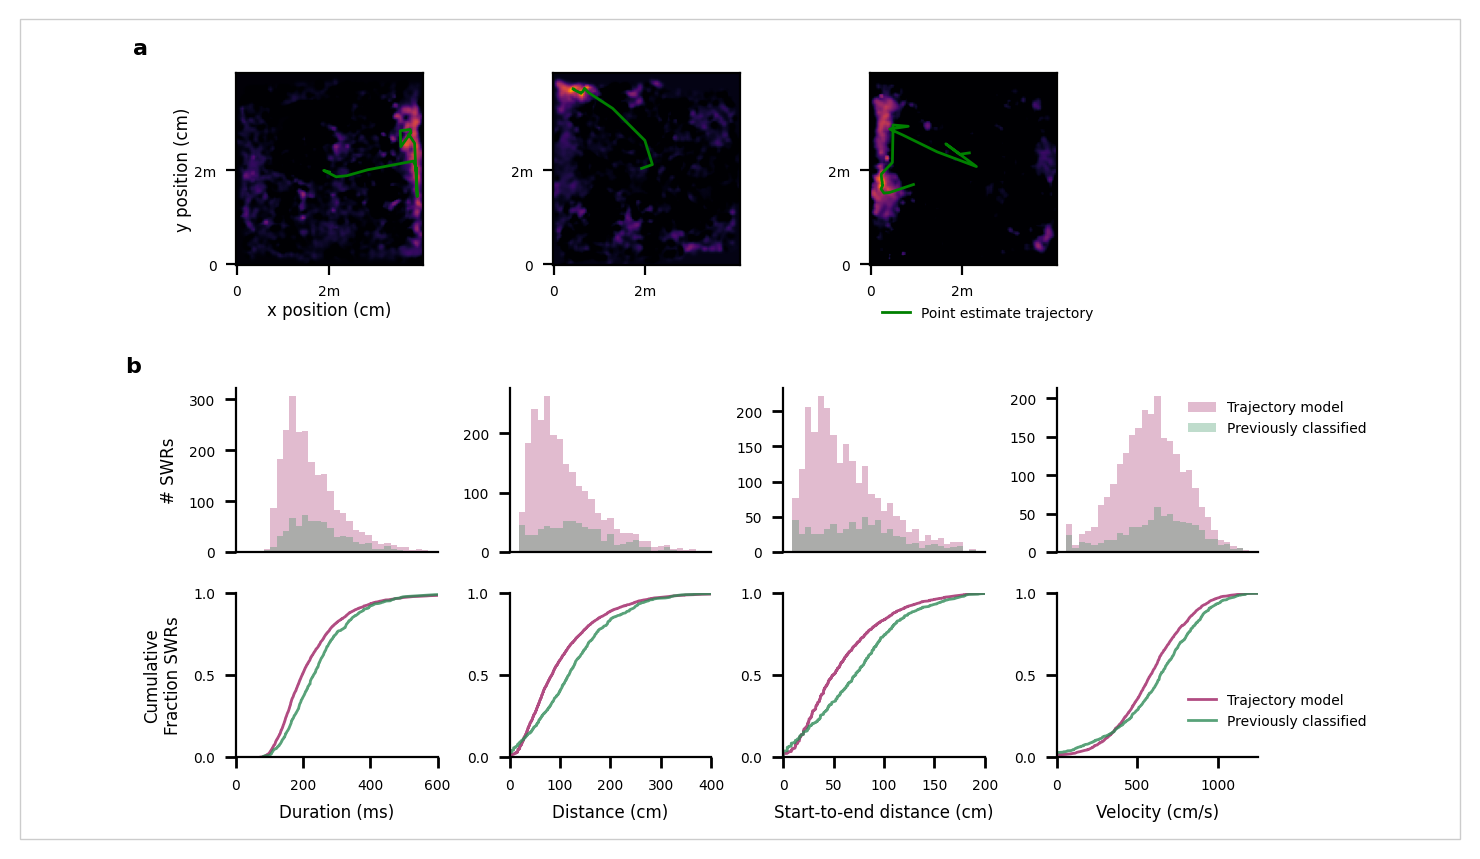

In [12]:
figure_width = 7.2
figure_height = 4.1
fig = plt.figure(figsize=(figure_width,figure_height), dpi=200)
ax = dict()

j = 0
margin = .15
panel_width = .13
panel_height = .234
w_spacing = .09
footer = .7
for i in range(3):
    left = margin + (panel_width + w_spacing)*i
    ax[j,i] = fig.add_axes([left, footer, panel_width, panel_height])
    
j=1
panel_width = .14
panel_height = .2
w_spacing = .05
footer = .35
for i in range(4):
    left = margin + (panel_width + w_spacing)*i
    ax[j,i] = fig.add_axes([left, footer, panel_width, panel_height])
    
    
j=2
footer = .1
for i in range(4):
    left = margin + (panel_width + w_spacing)*i
    ax[j,i] = fig.add_axes([left, footer, panel_width, panel_height])

ripples_plot = [(4,184), (6,269), (7,157)]
j=0

for i, rd_ripple in enumerate(ripples_plot):
    marginals_plot = get_marginal_sum(np.exp(mean_trajectories_2cm[str(meta.Session_List[rd_ripple[0]])].results['posteriors'][rd_ripple[1]]), n_bins=100)
    ax[j,i].imshow(marginals_plot.T, aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4))
    ax[j,i].plot(mean_trajectories_2cm[str(meta.Session_List[rd_ripple[0]])].results['trajectory_map_positions'][rd_ripple[1]][:,0]/2,
            mean_trajectories_2cm[str(meta.Session_List[rd_ripple[0]])].results['trajectory_map_positions'][rd_ripple[1]][:,1]/2,
            color="green", linewidth=1, label="Point estimate trajectory")
    ax[j,i].set_xticks([0,49])
    ax[j,i].set_xticklabels(["0","2m"])
    ax[j,i].set_yticks([0,49])
    ax[j,i].set_yticklabels(["0","2m"])

ax[j,0].set_xlabel('x position (cm)', labelpad=1)
ax[j,0].set_ylabel('y position (cm)', labelpad=1)
ax[j,2].legend(frameon=False, loc=3, bbox_to_anchor=(0,-.35,0,0))

# -----------------------------

j=1
k=2
colors = {'trajectory': '#9e1f63', 'pf_classified': 'seagreen'}

stats_plot = ['duration_ms', 'distance_cm', 'direct_distance_cm', 'velocity_cm_s']#, 'velocity_cm_ms']
stats_plot_names = ['Duration (ms)', 'Distance (cm)', 'Start-to-end distance (cm)', 'Velocity (cm/s)']
max_stat = [600, 400, 200, 1250]

for i, stat in enumerate(stats_plot):
    bins = np.linspace(0, max_stat[i],30)
    for traj_type in ['trajectory', 'pf_classified']:
        if traj_type == 'trajectory':
            ax[j,i].hist(temporal_df[stat], bins=bins, density=False, color=colors[traj_type], alpha=.3, label='Trajectory model')
            total = len(temporal_df)
            ax[k,i].plot(np.sort(temporal_df[stat]), np.arange(total)/(total-1), color=colors[traj_type], alpha=.8, label='Trajectory model',
                        linewidth=1)
        elif traj_type == 'pf_classified':
            ax[j,i].hist(map_df[stat], bins=bins, density=False, color=colors[traj_type], alpha=.3, label='Previously classified')
            total = len(map_df)
            ax[k,i].plot(np.sort(map_df[stat]), np.arange(total)/(total-1), color=colors[traj_type], alpha=.8, label='Previously classified',
                        linewidth=1)
    stats_results = sp.ttest_ind(temporal_df[stat], map_df[stat])
    print(f't({stats_results[0].round(4)}), corrected p-value {stats_results[1]*3}')
    
    ax[k,i].set_xlabel(stats_plot_names[i])
    ax[j,i].tick_params(direction='out', length=4, width=1)
    ax[k,i].tick_params(direction='out', length=4, width=1)
    ax[j,i].spines['top'].set_visible(False)
    ax[j,i].spines['right'].set_linewidth(False)
    ax[k,i].spines['top'].set_visible(False)
    ax[k,i].spines['right'].set_linewidth(False)
    ax[k,i].set_xlim([0,max_stat[i]])
    ax[k,i].set_ylim([0,1])
    ax[k,i].set_yticks(np.linspace(0,1,3))
    ax[j,i].set_xticks([])
    if i ==3:
        ax[k,i].legend(frameon=False, loc=4, bbox_to_anchor=(1.6,0.1,0,0))
        ax[j,i].legend(frameon=False, loc=1, bbox_to_anchor=(1.6,1.0,0,0))
    if i == 0:
        ax[k,i].set_ylabel('Cumulative\nFraction SWRs')
        ax[j,i].set_ylabel('# SWRs')

ax[0,0].text(-.55,1.1, 'a', size=8, transform=ax[0,0].transAxes, fontweight='bold')
ax[0,0].text(-.55,1.1, 'b', size=8, transform=ax[1,0].transAxes, fontweight='bold')

plt.savefig(os.path.join(meta.FIGURES_PATH, "FigureS2.png"), dpi=600, transparent=True)

print(f"degrees of freedom={len(temporal_df) + len(map_df)}")
        
rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0, 0), 1, 1, fill=False, color="k", lw=.5, alpha=.2,
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])